# Regression House Prices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from tqdm.notebook import *

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
# b) Load the dataset
hp=pd.read_csv('house_price.csv', index_col='Id')
hp

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
# c) display info
hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
# d_1) missing values are more than 80%
print('Variables have more than 80% missing values: ', 0.8 * len(hp))

missing = hp.isnull().sum() / len(hp)
missing = missing[missing > 0.8]
missing.sort_values(inplace=True)
missing

Variables have more than 80% missing values:  1168.0


Fence          0.807534
Alley          0.937671
MiscFeature    0.963014
PoolQC         0.995205
dtype: float64

In [5]:
# d_2)delete missing values more than 80%
hp = hp.drop(missing.index, axis=1)
hp

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500


In [6]:
#check missing values
missing = hp.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing


Electrical        1
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
BsmtExposure     38
BsmtFinType2     38
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
LotFrontage     259
FireplaceQu     690
dtype: int64

In [7]:
# e) replace numerical missing values with mean
numeric_cols = hp.select_dtypes(include='number').columns 
hp[numeric_cols] = hp[numeric_cols].fillna(hp[numeric_cols].mean())

# Check for remaining numerical missing values, descending order
missing = hp.select_dtypes(include='number').isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False, inplace=True)
missing


Series([], dtype: int64)

In [8]:
#check missing values for non-numerical variables descending
missing = hp.select_dtypes(exclude='number').isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True, ascending=False)
missing

FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
Electrical        1
dtype: int64

In [9]:
# f) Transform each categorical variable into binary variables (encode the categorical variables)
hp = pd.get_dummies(hp, drop_first=True)
hp

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
#  g) Create an object y containing the target variable SalePrice and an object X containing the rest of the variables
y = hp['SalePrice']
X = hp.drop('SalePrice', axis=1)
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,0,1,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,0,1,0,0,0,1,0


In [11]:
# h) split into training and test sets, 30%  test size, randome state 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# i) Standardize the data(X_train_scaled, X_test_scaled)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    # only transform, no fitting


### Linear Regression and Evaluation

In [ ]:
#(j) Create a linear regression model. Fit the model on the standardized train data. View model performance on standardized train and test data.
lr = LinearRegression()
lr.fit(X_train_scaled, y_train) # fit the model on the standardized train data
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

# Score of the model    
print("Coefficient of determination of the LR model TRAIN :", lr.score(X_train_scaled, y_train))
print("Coefficient of determination of the LR model TEST :", lr.score(X_test_scaled, y_test))

Coefficient of determination of the model TRAIN : 0.93438199365397
Coefficient of determination of the model TEST : 0.7225208265141481


Key Observations and Potential Issues

Overfitting: The substantial drop in R-squared from the training set (0.9343) to the test set (0.7216) strongly suggests overfitting. Your model is fitting the training data very well, but it's not generalizing as well to unseen data.
Good but not perfect: An R-squared of 0.7216 on the test set is still a decent result, indicating that your model has captured a significant portion of the underlying patterns. However, there's room for improvement.
Possible Actions (Similar to RMSE recommendations)

Regularization: Apply regularization techniques (L1, L2) to penalize complex models and reduce overfitting.
Cross-validation: Use cross-validation to get a more reliable estimate of your model's performance on unseen data.
Simplify the Model: If your model is too complex, consider simplifying it by reducing the number of features or using a simpler algorithm.
Feature Engineering: Re-evaluate your features. Make sure they are relevant and that you aren't including redundant or noisy features.
More Data: If possible, try to gather more training data, as this can often help reduce overfitting.
Check for Data Issues: Ensure that your training and test sets are representative of the same population and that there are no data quality problems.

In [38]:
#(k) Calculate the root of the mean square error of this model on the standardized train and test data. Interpret the results.
print('RMSE of the model lr TRAIN :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE of the model lr TEST :', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Substantial difference between the RMSE of the train and test data strongly indicates overfitting. The model is not generalizing well to unseen data.')


RMSE of the model lr TRAIN : 19872.76838408467
RMSE of the model lr TEST : 44003.13272134404
Substantial difference between the RMSE of the train and test data strongly indicates overfitting. The model is not generalizing well to unseen data.


## Ridge Regression (penalized model)
As the results for the lr are not good for the test set.
The standardized data will be used

In [ ]:
# Ridge Regression
# l) Create a Ridge regression model. Fit the model on the standardized train data. View model performance on standardized train and test data.


In [39]:
# l) Fill in the blanks below to find the alpha that optimises the result. 
# This code is used to do a manual GridSearchCV, and tqdm_notebook(alpha) is used to display the loop progress bar.

# Initialize an empty list to store DataFrames
df_resultat_ridge = []
alphas = [0.01, 0.05, 0.1, 0.3, 0.8, 1, 5, 10, 15, 20, 35, 50]

for alpha in tqdm_notebook(alphas):
    ridge = Ridge(alpha=alpha)  # Ridge regression model with current alpha
    y_pred = ridge.fit(X_train_scaled, y_train).predict(X_test_scaled)  # Fit and predict
    mse_result = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
    
    # Create a DataFrame for the current alpha
    res = pd.DataFrame({"Features": X_train.columns, "Coefficients": ridge.coef_})
    res["alpha"] = alpha
    res["mse"] = mse_result
    
    # Append the DataFrame to the list
    df_resultat_ridge.append(res)

# Concatenate all DataFrames in the list into a single DataFrame
df_resultat_ridge = pd.concat(df_resultat_ridge, ignore_index=True)

# Group by "alpha" and calculate the mean mse
alphas_result = df_resultat_ridge.groupby("alpha")["mse"].mean()

  0%|          | 0/12 [00:00<?, ?it/s]

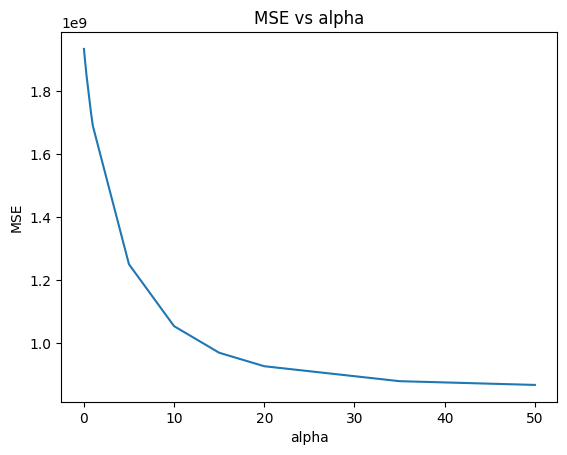

In [ ]:
# m) graph of MSE and Ridge regression for each alpha
plt.plot(alphas_result)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("MSE vs alpha")
plt.show()

In [ ]:
# (n) From the graph, create a high-performance Ridge regression model. Fit the model on the standardized train data. 
# View model performance on standardized train and test data.
ridge = Ridge(alpha=17)
ridge.fit(X_train_scaled, y_train)
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)  # Predict
#performance
print("Coefficient of determination of the ridge model TRAIN :", ridge.score(X_train_scaled, y_train))
print("Coefficient of determination of the ridge model TEST :", ridge.score(X_test_scaled, y_test))



Coefficient of determination of the model TRAIN : 0.9221990233092398
Coefficient of determination of the model TEST : 0.8640633646928574


In [59]:
# o) Root mse of the Ridge regression model on the standardized train and test data. Interpret the results.
print('RMSE of the model ridge TRAIN :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE of the model ridge TEST :', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('The RMSE of the test data is lower than that of the train data, which is an indication of a good model that generalizes well to unseen data.')

print('\n')
print('The Ridge Regression has a smaller difference between the RMSE of the train and test data compared to Linear Regression. \n'
	  'This suggests that the Ridge Regression with L2 regularization has reduced overfitting compared to the linear regression model. \n'
	  'Ridge regression also shows overfitting however, comparedto the linear regression model  is better.')


#refresh from linear regression regression:  
#RMSE of the model lr TRAIN : 19872.76838408467
#RMSE of the model lr TEST : 44003.13272134404)

RMSE of the model ridge TRAIN : 21639.10926287314
RMSE of the model ridge TEST : 30799.00301503043
The RMSE of the test data is lower than that of the train data, which is an indication of a good model that generalizes well to unseen data.


The Ridge Regression has a smaller difference between the RMSE of the train and test data compared to Linear Regression. 
This suggests that the Ridge Regression with L2 regularization has reduced overfitting compared to the linear regression model. 
Ridge regression also shows overfitting however, comparedto the linear regression model  is better.


In [65]:
# p) gridsearchcv cv=3, target metric is to mininimize the mean squared error

#from sklearn.linear_model import ElasticNet
#from sklearn.model_selection import GridSearchCV

# Define the parameter grid
alpha = [0.01, 0.02, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
l1_ratio = np.arange(0.0, 1.01, 0.05)  # ElasticNet-specific parameter
param_grid = {'alpha': alpha, 'l1_ratio': l1_ratio}

# Use ElasticNet (not ridge)
elastic_net = ElasticNet()
grid_search = GridSearchCV(elastic_net, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)





GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.02, 0.05, 0.1, 0.5, 1.0, 2.0, 5.0,
                                   10.0],
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
             scoring='neg_mean_squared_error')

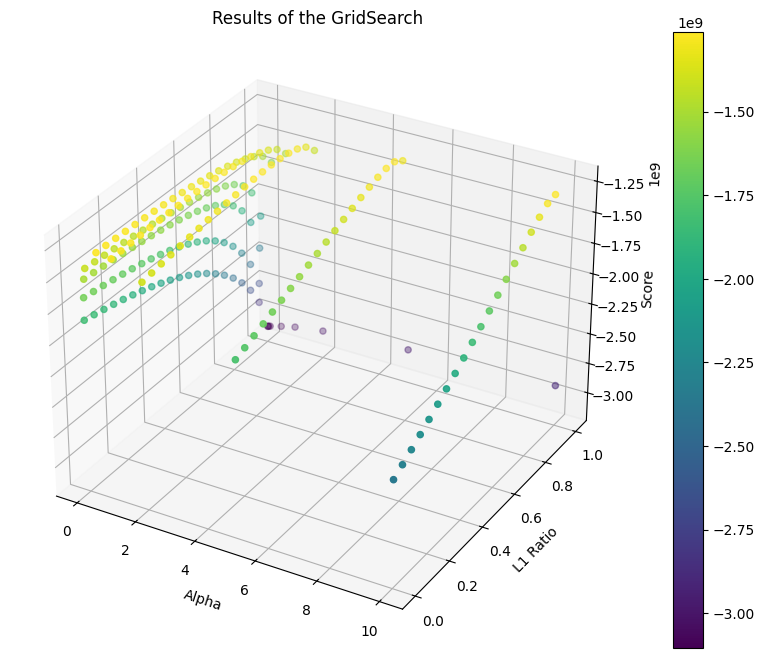

In [66]:
# q)  combinations of alpha and l1_ratio that optimize the result
alphas = grid_search.cv_results_['param_alpha'].data
l1_ratios = grid_search.cv_results_['param_l1_ratio'].data
scores = grid_search.cv_results_['mean_test_score']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

colors = scores

scatter=ax.scatter(alphas, l1_ratios, scores, c=colors, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Alpha')
ax.set_ylabel('L1 Ratio')
ax.set_zlabel('Score')
ax.set_title('Results of the GridSearch')

plt.show();

In [ ]:
# graph interpretation: 
# negative log score --> score: highest is closer to zero, 
# yellow dots are the best scores,
#best params are alpha=0.01 and l1_ratio=0.0

In [74]:
# q) Score for each alpha and l1_ratio
# q) Score for each alpha and l1_ratio
cvres = grid_search.cv_results_
for mean_score, params, rank in zip(cvres["mean_test_score"], cvres["params"], cvres["rank_test_score"]):
    print(f"RMSE: {np.sqrt(-mean_score):.4f}, Rank: {rank}, Params: {params}")

RMSE: 42806.8261, Rank: 138, Params: {'alpha': 0.01, 'l1_ratio': 0.0}
RMSE: 42998.5492, Rank: 139, Params: {'alpha': 0.01, 'l1_ratio': 0.05}
RMSE: 43204.9405, Rank: 142, Params: {'alpha': 0.01, 'l1_ratio': 0.1}
RMSE: 43427.6854, Rank: 143, Params: {'alpha': 0.01, 'l1_ratio': 0.15000000000000002}
RMSE: 43668.7242, Rank: 145, Params: {'alpha': 0.01, 'l1_ratio': 0.2}
RMSE: 43930.2983, Rank: 148, Params: {'alpha': 0.01, 'l1_ratio': 0.25}
RMSE: 44215.0159, Rank: 150, Params: {'alpha': 0.01, 'l1_ratio': 0.30000000000000004}
RMSE: 44525.9183, Rank: 152, Params: {'alpha': 0.01, 'l1_ratio': 0.35000000000000003}
RMSE: 44866.5918, Rank: 154, Params: {'alpha': 0.01, 'l1_ratio': 0.4}
RMSE: 45241.2861, Rank: 156, Params: {'alpha': 0.01, 'l1_ratio': 0.45}
RMSE: 45655.0782, Rank: 160, Params: {'alpha': 0.01, 'l1_ratio': 0.5}
RMSE: 46114.1249, Rank: 162, Params: {'alpha': 0.01, 'l1_ratio': 0.55}
RMSE: 46625.9541, Rank: 165, Params: {'alpha': 0.01, 'l1_ratio': 0.6000000000000001}
RMSE: 47199.9845, Rank:

In [75]:
# r) Get the best parameters
print('Best Params: ', grid_search.best_params_)

# model with best params
elastic_net = ElasticNet(alpha=2.0, l1_ratio=0.7)
elastic_net.fit(X_train_scaled, y_train)
y_train_pred = elastic_net.predict(X_train_scaled)
y_test_pred = elastic_net.predict(X = X_test_scaled)    # Predict


Best Params:  {'alpha': 2.0, 'l1_ratio': 0.7000000000000001}


In [76]:
#scores elastic net
print("Coefficient of determination of the elasticnet model TRAIN :", elastic_net.score(X_train_scaled, y_train))
print("Coefficient of determination of the elastic model TEST :", elastic_net.score(X_test_scaled, y_test))


Coefficient of determination of the elasticnet model TRAIN : 0.8704074111979181
Coefficient of determination of the elastic model TEST : 0.858052985657352


In [77]:
# s) root mean squared error
print('RMSE of the model elastic_net TRAIN :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE of the model elastic_net TEST :', np.sqrt(mean_squared_error(y_test, y_test_pred)))


RMSE of the model elastic_net TRAIN : 27927.8136592779
RMSE of the model elastic_net TEST : 31472.520953498366


In [ ]:
# interpretation
print('The Elastic Net model explains approximately 87.04% of the variance in the training data and 85.81% of the variance in the test data.')
print('This indicates a good fit on both datasets, with a (slight) decrease in performance on the unseen test data.')


#rmse: 
#The model's predictions are off by approximately 21062.05 units on the training data and 32373.58 units on the test data.
#This shows that the model's errors are reasonably consistent between the training and test sets, suggesting good generalization.

# Comparison to previous models


# SCORES
# Linear Regression
Coefficient of determination of the model TRAIN : 0.93438199365397
Coefficient of determination of the model TEST : 0.7225208265141481
RMSE of the model lr TRAIN : 19872.76838408467
RMSE of the model lr TEST : 44003.13272134404


# Ridge Regression
Coefficient of determination of the model TRAIN : 0.9221990233092398
Coefficient of determination of the model TEST : 0.8640633646928574
RMSE of the model ridge TRAIN : 21639.10926287314
RMSE of the model ridge TEST : 30799.00301503043


# Elastic Net
Coefficient of determination of the elasticnet model TRAIN : 0.8704074111979181
Coefficient of determination of the elastic model TEST : 0.858052985657352
RMSE of the model elastic_net TRAIN : 27927.8136592779
RMSE of the model elastic_net TEST : 31472.52095349836


#exam:

#comparative analysis

# SCORES
# Linear Regression
Coefficient of determination of the LR model TRAIN : 0.9343820106960443
Coefficient of determination of the LR model TEST : -2412359315970546.0
RMSE of the model lr TRAIN : 19872.765803442286
RMSE of the model lr TEST : 4102885508019.6777


# Ridge Regression
Coefficient of determination of the ridge model TRAIN : 0.9221990233092414
Coefficient of determination of the ridge model TEST : 0.8640633646928528
RMSE of the model ridge TRAIN : 21639.109262872913
RMSE of the model ridge TEST : 30799.00301503095


# Elastic Net
Coefficient of determination of the elasticnet model TRAIN : 0.8704074111979181
Coefficient of determination of the elastic model TEST : 0.858052985657352
RMSE of the model elastic_net TRAIN : 27927.8136592779
RMSE of the model elastic_net TEST : 31472.52095349836

Comparative Analysis

Overfitting:
Logistic Regression showed significant overfitting, with a large difference between training and test RMSE.
Ridge Regression reduced overfitting compared to Logistic Regression, but still had a noticeable difference between training and test R².
Elastic net also reduces overfitting. The difference between the train and test R squared, and RMSE values are closer then the logistic regressions results.   
Generalization:
Elastic Net and Ridge Regression have better generalization performance than Logistic Regression, as indicated by their lower test RMSE and higher test R².
Elastic net has a better test R squared value than the ridge regression.
Overall Performance:
Elastic Net appears to provide a good balance between fitting the training data and generalizing to unseen data.
Elastic net has the best test R squared value of all three models.
Ridge regression has the best test RMSE value of all three models.
Model Selection:
Based on these results, Elastic Net and Ridge Regression are better choices than Logistic Regression for this problem.
Depending on if R squared, or RMSE is more important to the problem, will decide if Elastic net or ridge regression is the best model.
Key Takeaways

Elastic Net, with its combination of L1 and L2 regularization, effectively addresses overfitting and provides good generalization.   
Compared to Ridge Regression, Elastic Net has a better test R squared value, but a slightly higher test RMSE value.
The choice between Elastic Net and Ridge Regression might depend on the specific priorities of your problem (e.g., minimizing RMSE vs. maximizing R²).
Logistic regression is the worst model of the three.